# Распознавание цифр, написанных от руки 

Датасет: MNIST 

Данная нейронная сеть апозволяет распознавать вручную написанные цифры на основе MNIST датасета, состоящего из 60 000 изображений для обучения и 10 000 изображений для тестирования. Размер изображений - 28х28 px.

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf
from tensorflow.keras import layers

print(tf.VERSION)
print(tf.keras.__version__)

1.13.1
2.2.4-tf


In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

7


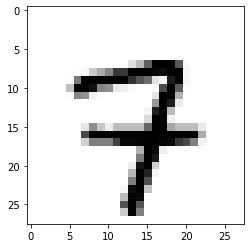

In [6]:
image_index = 324 
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys')

In [7]:
print('Размер: обучающего датасета',x_train.shape[0], '\n'
     'Размер изображений:',x_train.shape[1], 'x', x_train.shape[2],'\n')

print('Размер тестового датасета:',x_test.shape[0], '\n'
     'Размер изображений:',x_test.shape[1], 'x', x_test.shape[2])
print(x_test.shape)

Размер: обучающего датасета 60000 
Размер изображений: 28 x 28 

Размер тестового датасета: 10000 
Размер изображений: 28 x 28
(10000, 28, 28)


In [8]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255
print('Рамзерность обучающего датасета:', x_train.shape)
print('Количество изображений в обучающем датасете:', x_train.shape[0])
print('Количество изображений в тестовом датасете:', x_test.shape[0])

Рамзерность обучающего датасета: (60000, 28, 28, 1)
Количество изображений в обучающем датасете: 60000
Количество изображений в тестовом датасете: 10000


In [9]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

Using TensorFlow backend.


In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [12]:
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 9s 150us/sample - loss: 0.2635 - acc: 0.9260
Epoch 2/10
60000/60000 [==============================] - 9s 143us/sample - loss: 0.1171 - acc: 0.9658
Epoch 3/10
60000/60000 [==============================] - 7s 119us/sample - loss: 0.0787 - acc: 0.9759
Epoch 4/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.0581 - acc: 0.9823
Epoch 5/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.0451 - acc: 0.9861
Epoch 6/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.0354 - acc: 0.9886
Epoch 7/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.0282 - acc: 0.9913
Epoch 8/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.0234 - acc: 0.9928
Epoch 9/10
60000/60000 [==============================] - 7s 124us/sample - loss: 0.0189 - acc: 0.9944
Epoch 10/10
60000/60000 [==============================] - 8s 125us/sampl

In [13]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 62us/sample - loss: 0.0728 - acc: 0.9803


[0.0727556365553799, 0.9803]

2


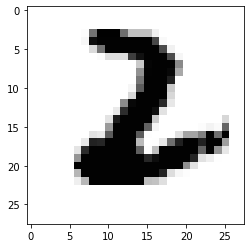

In [15]:
image_index = 2353
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())